## Relevant Links and Resources
Visualization in Python:
https://seaborn.pydata.org/generated/seaborn.heatmap.html
https://matplotlib.org/stable/tutorials/colors/colormaps.html
https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger

Algorithm Explanation:
http://weblog.jamisbuck.org/2010/12/29/maze-generation-eller-s-algorithm#

In [362]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import random

from pprint import pprint

In [363]:
class MazeCell:
    representation = None
    size = 1
    top = True
    bottom = True
    left = True
    right = True
    
    def __init__(self, size=3):
        self.top = True
        self.bottom = True
        self.left = True
        self.right = True
        self.size = size
        self.representation = np.zeros((size, size))
        
        # set outer squares to 1
        # loop over rows
        for i in range(0, size):
            # loop over columns
            for j in range(0, size):
                if (i%(size-1) == 0) or (j%(size-1) == 0):
                    self.representation[i, j] = 1
        
    def update(self):
        if self.top == False:
            # in removing top, want to do 1 0 0 ... 0 0 1 not all 0s.
            for i in range(1, self.size-1):
                self.representation[0, i] = 0
        if self.bottom == False:
            # in removing bottom, want to do 1 0 0 ... 0 0 1 not all 0s.
            for i in range(1, self.size-1):
                self.representation[self.size-1, i] = 0
        if self.left == False:
            # in removing sides, want to do 0 0 0 ... 0 0 0 no 1s.
            for i in range(1, self.size-1):
                self.representation[i, 0] = 0
        if self.right == False:
            # in removing sides, want to do 0 0 0 ... 0 0 0 no 1s.
            for i in range(1, self.size-1):
                self.representation[i, self.size-1] = 0    

    def remove(self, item):
        if item == "top":
            self.top = False
        elif item == "bottom":
            self.bottom = False
        elif item == "left":
            self.left = False
        elif item == "right":
            self.right = False
        self.update()
        
    def reset(self):
        self.representation = np.zeros((self.size, self.size))
        
        # set outer squares to 1
        # loop over rows
        for i in range(0, self.size):
            # loop over columns
            for j in range(0, self.size):
                if (i%(self.size-1) == 0) or (j%(self.size-1) == 0):
                    self.representation[i, j] = 1
                    
    def get_rep(self):
        return self.representation

In [400]:
# demonstrate removal.
new_mazecell = MazeCell(size=4)
new_mazecell.remove("bottom")
print(new_mazecell.representation)
new_mazecell.reset()
new_mazecell.remove("top")
print(new_mazecell.representation)

[[1. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]
[[1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]


In [365]:
# if length of row array k, then k-1 joins exist
def choose_joins(row_array):
    remove_wall = [random.choice([True, False]) and (row_array[i] != row_array[i+1]) for i in range(len(row_array) - 1)]
    return remove_wall
    

def choose_last_row_joins(row_array):
    # create list of True or False to decide which walls to remove
    # have to remove all adjacent but disjoint sets
    # i.e. 7 | 6 is a removal. 7 | 7 is not
    # adjacent is i+1, disjoint is !=
    remove_wall = [(row_array[i] != row_array[i+1]) for i in range(len(row_array) - 1)]
#     print("Removing {} walls".format(remove_wall.count(True)))
    return remove_wall


#remove joins in place
def remove_joins(row_array, join_array, cell_row_array):
    current_counter = row_array[0]
    for index, r in enumerate(join_array):
        if r: # remove if True
            # only connect if setnumber of next cell is not same as this
            if row_array[index] != row_array[index + 1]:
                cell_row_array[index].remove("right")
                cell_row_array[index+1].remove("left")
                row_array[index+1] = current_counter
        else: #don't remove if False, restart set number
            current_counter = row_array[index+1]


def make_vconns(row_set_array, row_next_set_array):
    amt_vconn = 0 #monitor how many downwards connections we make
    
    #true or false. True if connected down, false if not
    vertical_connect = [False for i in range(len(row_set_array))] 

    for index, setnum in enumerate(row_set_array):
        #check that it's not last element
        if (index != len(row_set_array) - 1):
            #check if the next cell is NOT part of the same set
            if (row_set_array[index] != row_set_array[index+1]):
                #make a connection if no conns made yet
                if (amt_vconn == 0) or random.choice([True, False]):
                    vertical_connect[index] = True
                    row_next_set_array[index] = setnum
                amt_vconn = 0

            #else do the usual, try to randomly add a connection
            else:
                if random.choice([True, False]):
                    vertical_connect[index] = True
                    row_next_set_array[index] = setnum   
                    amt_vconn += 1

        #if it is the last element, then check if amt_vconn is 0 (i.e. it's a new set)
        else:
            if amt_vconn == 0:
                #make a connection
                    vertical_connect[index] = True
                    row_next_set_array[index] = setnum
                    amt_vconn += 1
                    
    return vertical_connect

def remove_vertical_joins(vertical_connects, cell_row_array, offset=0):
    cra0 = cra[offset]
    cra1 = cra[offset+1]
    for index in range(len(cra0)):
        if vertical_connects[index]: # remove if True
            cra0[index].remove("bottom")
            cra1[index].remove("top")

In [366]:
ELLERS_TEST_ROW_LENGTH = 8
ELLERS_TEST_ROW_HEIGHT = 8

cra = []
rsa = []

# generate first row
row_set_array = list(range(0, ELLERS_TEST_ROW_LENGTH))
join_array = choose_joins(row_set_array)

cra.append([MazeCell(size=4) for i in row_set_array])
remove_joins(row_set_array, join_array, cra[0])

for i in range(ELLERS_TEST_ROW_HEIGHT - 1):
    rsa.append(row_set_array)
    #generate next row
    #set generation problem point????
    row_next_set_array = list(range((i+1) * len(row_set_array), (i+2) * len(row_set_array)))

    # randomly determine vertical connections
    vertical_connect = make_vconns(row_set_array, row_next_set_array)

    cra.append([MazeCell(size=4) for i in row_set_array])

    remove_vertical_joins(vertical_connect, cra, offset=i)
    
    # check that it's NOT the last row
    if i != (ELLERS_TEST_ROW_HEIGHT - 1 - 1):
        join_array2 = choose_joins(row_next_set_array)
    # if last row, have to remove all adjacent but disjoint connections
    else:
        join_array2 = choose_last_row_joins(row_next_set_array)
        
    remove_joins(row_next_set_array, join_array2, cra[i+1])

    # overwrite new row with old row
    row_set_array = row_next_set_array

rsa.append(row_set_array)

[[0, 1, 1, 1, 4, 4, 4, 7],
 [0, 0, 1, 1, 12, 12, 12, 7],
 [0, 17, 1, 1, 20, 20, 12, 7],
 [0, 0, 0, 0, 0, 20, 20, 20],
 [0, 0, 34, 35, 35, 35, 35, 20],
 [40, 0, 0, 0, 35, 35, 35, 35],
 [40, 40, 40, 0, 35, 35, 35, 55],
 [40, 40, 40, 40, 40, 40, 40, 40]]


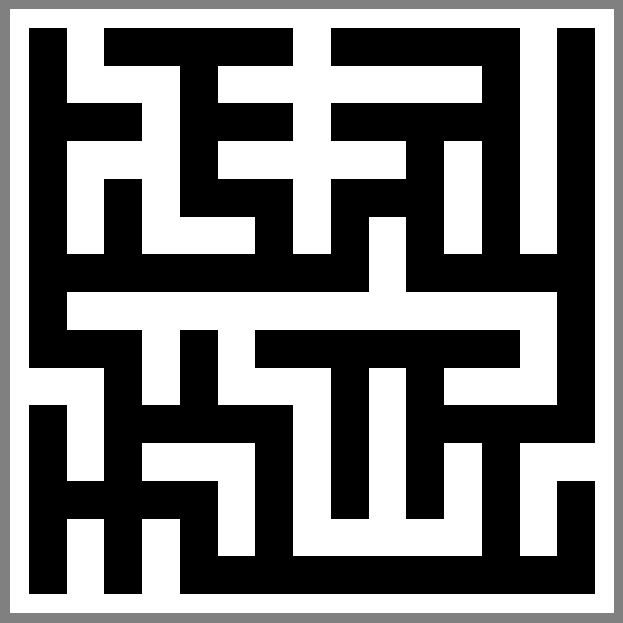

In [367]:
#display
pprint(rsa)

screen2 = np.zeros((len(cra)*4, len(row_set_array)*4))
for i in range(0, len(cra)):
    for j in range(0, len(row_set_array)):
        screen2[i*4:(i*4)+4, j*4:(j*4)+4] += cra[i][j].representation
       
fig=plt.figure(figsize=(12,8), dpi=100, facecolor='0.5', edgecolor='k')
ax = sns.heatmap(screen2, linewidth=0.0, square=True, xticklabels = False, yticklabels=False, cbar=False, cmap="binary_r")
plt.show()

# Final result 32x8 (128x32 screen)
(Combine display and generation together)

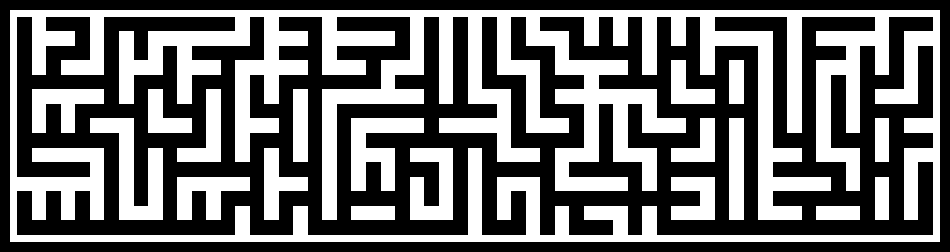

In [393]:
ELLERS_TEST_ROW_LENGTH = 32
ELLERS_TEST_ROW_HEIGHT = 8

cra = []
rsa = []

# generate first row
row_set_array = list(range(0, ELLERS_TEST_ROW_LENGTH))
join_array = choose_joins(row_set_array)

cra.append([MazeCell(size=4) for i in row_set_array])
remove_joins(row_set_array, join_array, cra[0])

for i in range(ELLERS_TEST_ROW_HEIGHT - 1):
    rsa.append(row_set_array)
    #generate next row
    #set generation problem point????
    row_next_set_array = list(range((i+1) * len(row_set_array), (i+2) * len(row_set_array)))

    # randomly determine vertical connections
    vertical_connect = make_vconns(row_set_array, row_next_set_array)

    cra.append([MazeCell(size=4) for i in row_set_array])

    remove_vertical_joins(vertical_connect, cra, offset=i)
    
    # check that it's NOT the last row
    if i != (ELLERS_TEST_ROW_HEIGHT - 1 - 1):
        join_array2 = choose_joins(row_next_set_array)
    # if last row, have to remove all adjacent but disjoint connections
    else:
        join_array2 = choose_last_row_joins(row_next_set_array)
        
    remove_joins(row_next_set_array, join_array2, cra[i+1])

    # overwrite new row with old row
    row_set_array = row_next_set_array

rsa.append(row_set_array)

#display
# pprint(rsa)
# print(np.array(rsa))

screen3 = np.zeros((len(cra)*4, len(row_set_array)*4))
for i in range(0, len(cra)):
    for j in range(0, len(row_set_array)):
        screen3[i*4:(i*4)+4, j*4:(j*4)+4] += cra[i][j].representation
       
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='0.0', edgecolor='k')
ax = sns.heatmap(screen3, linewidth=0.0, square=True, xticklabels = False, yticklabels=False, cbar=False, cmap="binary_r")
plt.show()

In [369]:
# if you want to save maze as sequence of 1s 0s in text file
# np.savetxt("something.txt", screen3, fmt="%d")

# Square Matrix Maze

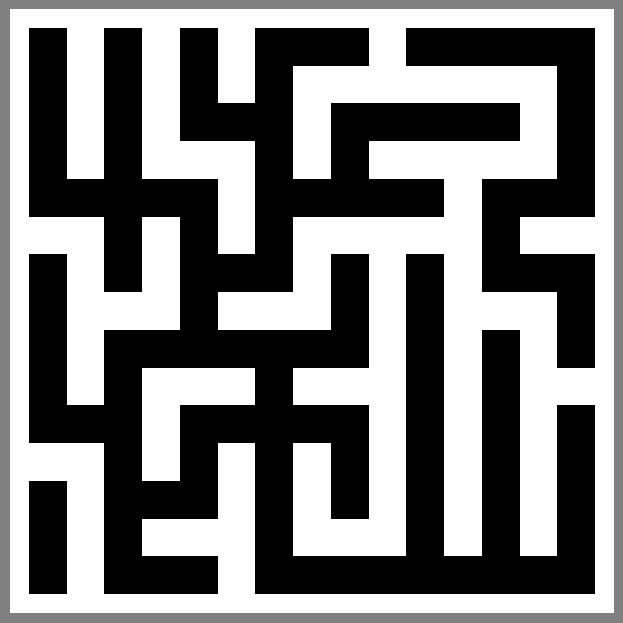

In [370]:
ELLERS_TEST_ROW_LENGTH = 8
ELLERS_TEST_ROW_HEIGHT = 8

cra = []
rsa = []

# generate first row
row_set_array = list(range(0, ELLERS_TEST_ROW_LENGTH))
join_array = choose_joins(row_set_array)

cra.append([MazeCell(size=4) for i in row_set_array])
remove_joins(row_set_array, join_array, cra[0])

for i in range(ELLERS_TEST_ROW_HEIGHT - 1):
    rsa.append(row_set_array)
    #generate next row
    row_next_set_array = list(range(len(row_set_array), 2*len(row_set_array)))

    # randomly determine vertical connections
    vertical_connect = make_vconns(row_set_array, row_next_set_array)

    cra.append([MazeCell(size=4) for i in row_set_array])

    remove_vertical_joins(vertical_connect, cra, offset=i)
    
    # check that it's NOT the last row
    if i != (ELLERS_TEST_ROW_HEIGHT - 1 - 1):
        join_array2 = choose_joins(row_next_set_array)
    # if last row, have to remove all adjacent but disjoint connections
    else:
        join_array2 = choose_last_row_joins(row_next_set_array)
        
    remove_joins(row_next_set_array, join_array2, cra[i+1])

    # overwrite new row with old row
    row_set_array = row_next_set_array

#display
screen4 = np.zeros((len(cra)*4, len(row_set_array)*4))
for i in range(0, len(cra)):
    for j in range(0, len(row_set_array)):
        screen4[i*4:(i*4)+4, j*4:(j*4)+4] += cra[i][j].representation
       
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='0.5', edgecolor='k')
ax = sns.heatmap(screen4, linewidth=0.0, square=True, xticklabels = False, yticklabels=False, cbar=False, cmap="binary_r")
plt.show()

In [371]:
rsa

[[0, 1, 2, 3, 3, 5, 5, 5],
 [0, 1, 2, 2, 12, 12, 12, 5],
 [0, 0, 0, 2, 2, 2, 14, 14],
 [8, 0, 0, 0, 12, 13, 14, 14],
 [8, 9, 9, 9, 9, 13, 14, 14],
 [8, 8, 10, 10, 10, 13, 14, 15],
 [8, 8, 8, 10, 10, 13, 14, 15]]

In [372]:
make_vconns([0,1,1,1], [4,5,6,7])

[True, True, True, False]

# Final 8x8 Test?
Fixed Row Numbering

[[0, 0, 0, 0, 4, 5, 5, 5],
 [0, 0, 0, 0, 4, 5, 5, 15],
 [0, 17, 17, 19, 4, 4, 5, 15],
 [0, 17, 17, 19, 4, 4, 5, 15],
 [0, 0, 0, 0, 4, 4, 4, 15],
 [0, 0, 0, 0, 4, 4, 46, 15],
 [0, 0, 0, 0, 0, 0, 0, 15],
 [0, 0, 0, 0, 0, 0, 0, 0]]


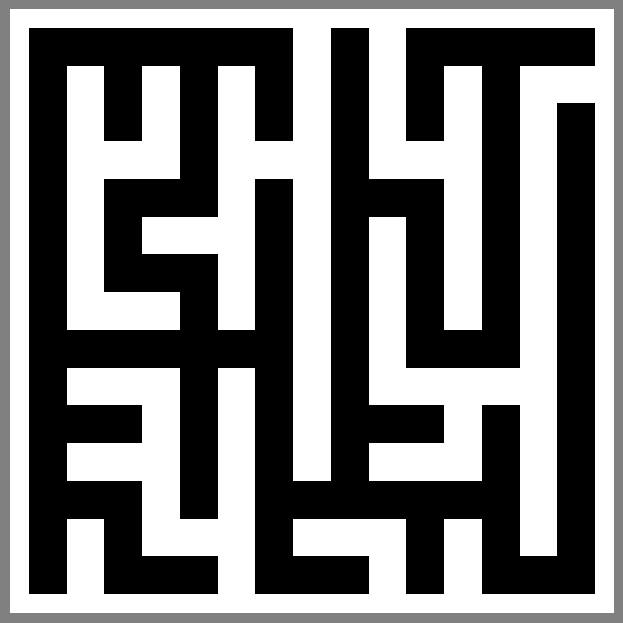

In [388]:
ELLERS_TEST_ROW_LENGTH = 8
ELLERS_TEST_ROW_HEIGHT = 8

cra = []
rsa = []

# generate first row
row_set_array = list(range(0, ELLERS_TEST_ROW_LENGTH))
join_array = choose_joins(row_set_array)

cra.append([MazeCell(size=4) for i in row_set_array])
remove_joins(row_set_array, join_array, cra[0])

for i in range(ELLERS_TEST_ROW_HEIGHT - 1):
    rsa.append(row_set_array)
    #generate next row
    #set generation problem point????
    row_next_set_array = list(range((i+1) * len(row_set_array), (i+2) * len(row_set_array)))

    # randomly determine vertical connections
    vertical_connect = make_vconns(row_set_array, row_next_set_array)

    cra.append([MazeCell(size=4) for i in row_set_array])

    remove_vertical_joins(vertical_connect, cra, offset=i)
    
    # check that it's NOT the last row
    if i != (ELLERS_TEST_ROW_HEIGHT - 1 - 1):
        join_array2 = choose_joins(row_next_set_array)
    # if last row, have to remove all adjacent but disjoint connections
    else:
        join_array2 = choose_last_row_joins(row_next_set_array)
        
    remove_joins(row_next_set_array, join_array2, cra[i+1])

    # overwrite new row with old row
    row_set_array = row_next_set_array

rsa.append(row_set_array)

#display
pprint(rsa)

screen2 = np.zeros((len(cra)*4, len(row_set_array)*4))
for i in range(0, len(cra)):
    for j in range(0, len(row_set_array)):
        screen2[i*4:(i*4)+4, j*4:(j*4)+4] += cra[i][j].representation
       
fig=plt.figure(figsize=(12,8), dpi=100, facecolor='0.5', edgecolor='k')
ax = sns.heatmap(screen2, linewidth=0.0, square=True, xticklabels = False, yticklabels=False, cbar=False, cmap="binary_r")
plt.show()

In [399]:
# Convert 1s and 0s to output that's representable in google sheets (useful in debugging algorithm in C)
k = """
11111111111111111111111111111111
10000000000000000000000110000001
10000000000000000000000110000001
10011001111111111111111110011111
10011001111111111111111110011111
10011000000000000001100000000001
10011000000000000001100000000001
10011001111110011111100111111111
10011001111110011111100111111111
10011000000000000000000110000001
10011000000000000000000110000001
10011001111111111111111110011111
10011001111111111111111110011111
10011000000000000000000000000001
10011000000000000000000000000001
11111001100111111111100111111111
11111001100111111111100111111111
10000001100110011001100000000001
10000001100110011001100000000001
10011111111110011001111110011111
10011111111110011001111110011111
10011000000000000000000000000001
10011000000000000000000000000001
10011001111111111111111110011111
10011001111111111111111110011111
10011000000110000000000000000001
10011000000110000000000000000001
10011001100110011001111110011111
10011001100110011001111110011111
10000000000000011001100000011001
10000000000000011001100000011001
10011111100110011001111111111001
10011111100110011001111111111001
10000001100000011000000110011001
10000001100000011000000110011001
10011111100110011111111110011001
10011111100110011111111110011001
10000001100000000001100000000001
10000001100000000001100000000001
10011111100111111111100111111111
10011111100111111111100111111111
10011000000000000000000000011001
10011000000000000000000000011001
10011001111111111111100111111001
10011001111111111111100111111001
10000000000000011000000110000001
10000000000000011000000110000001
10011001111111111001100110011111
10011001111111111001100110011111
10000001100000011001100110000001
10000001100000011001100110000001
10011001100111111111100110011111
10011001100111111111100110011111
10000000000000000000000000011001
10000000000000000000000000011001
10011111100111111111100111111001
10011111100111111111100111111001
10000000000000011000000000000001
10000000000000011000000000000001
10011001111111111001100111111111
10011001111111111001100111111111
10000000000110000001100000000001
10000000000110000001100000000001
10011111100110011111100110011111
10011111100110011111100110011111
10000001100110000001100110011001
10000001100110000001100110011001
10011111111110011111100111111001
10011111111110011111100111111001
10011001100110000001100000000001
10011001100110000001100000000001
10011001100111111111100111111111
10011001100111111111100111111111
10000000000000000000000000000001
10000000000000000000000000000001
10011111111111111111111110011111
10011111111111111111111110011111
10011000000000011001100000000001
10011000000000011001100000000001
10011111100111111001100111111001
10011111100111111001100111111001
10011000000000011001100110000001
10011000000000011001100110000001
10011111100111111001100111111001
10011111100111111001100111111001
10011000000000000000000000000001
10011000000000000000000000000001
10011001100110011111100111111001
10011001100110011111100111111001
10011001100000000000000110000001
10011001100000000000000110000001
10011111100111111111111110011111
10011111100111111111111110011111
10000000000000000000000110000001
10000000000000000000000110000001
10011111111111111111111111111111
10011111111111111111111111111111
10011000000110000000000000011001
10011000000110000000000000011001
10011111100110011111100111111001
10011111100110011111100111111001
10000000000000000001100110000001
10000000000000000001100110000001
10011111100110011111100111111001
10011111100110011111100111111001
10011000000110000001100000000001
10011000000110000001100000000001
10011001100111111111100111111111
10011001100111111111100111111111
10011001100110000000000110000001
10011001100110000000000110000001
10011001111111111111100111111001
10011001111111111111100111111001
10011000000000011000000110000001
10011000000000011000000110000001
10011111111111111111100110011111
10011111111111111111100110011111
10011000000110000000000110000001
10011000000110000000000110000001
10011001111110011111100110011001
10011001111110011111100110011001
10000001100000011000000000011001
10000001100000011000000000011001
10011111100110011111111110011001
10011111100110011111111110011001
10000000000110000000000110011001
10000000000110000000000110011001
11111111111111111111111111111111
"""

l = ""
for line in k.split("\n"):
    for x in line:
        l += x
        l += " "
    l += "\n"

print(l)


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 
1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 
1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 
1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 
1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 
1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 
1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 
1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 
1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 
1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 
1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 
1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 
1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 
1 1 1 1 1 0 0 1 1 0 0 1 